<a href="https://colab.research.google.com/github/joseruga/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana4/1%20Simulaci%C3%B3n_Agujas_de_Buffon_probabilidad_geom%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  math import sin, cos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

En la simulación de este notebook, se considera  que el tamaño de las agujas y la distancia entre las lineas del tapete es 1.

El código está inspirado en la propuesta de S.Hunter planteada en [este repositorio](https://github.com/samuelyhunter/Buffon/blob/master/buffon.py)


<center><img src='https://mste.illinois.edu/activity/buffon/situation.png'>

[fuente de la imagen](https://mste.illinois.edu/activity/buffon/)

# Funciones

In [2]:
def lanza_agujas(n):
    l = 1
    l_cuadrado = 10

    x = np.random.uniform(0, l_cuadrado, n) # coordenada x del centro de la aguja
    y = np.random.uniform(0, l_cuadrado, n) # cordenada y del centro del aguja
    𝜃 = np.random.uniform(0, np.pi, n) # angulo de rotación de la aguja en radianes, entre 0 y pi (180 grados)

    # Calcula coordenadas extremos (P1 y P2)
    x1 = x - (1/2 * np.cos(𝜃))
    y1 = y - (1/2 * np.sin(𝜃))

    x2 = x + (1/2 * np.cos(𝜃))
    y2 = y + (1/2 * np.sin(𝜃))

    # ¿Cruza alguna de las lineas del tapete?
    cruza = np.where(np.floor(y1) != np.floor(y2), 1, 0)


    df = pd.DataFrame({'x_centro':x, 'y_centro':y, '𝜃':𝜃,
                       'x1': x1,      'y1': y1,
                       'x2': x2,      'y2': y2,
                       'cruza':cruza
                      })

    return df

In [3]:
def AgujasDeBuffon(n):
        df = lanza_agujas(n)
        pi_est = 2/df['cruza'].mean()
        titulo = 'Simulación Agujas de Buffon'
        subtitulo = 'Estimación de pi: {} \ncon {} lanzamientos'.format(pi_est, n)

        fig = plt.figure(figsize=(8, 8))    
        fig.suptitle(titulo, size=16, ha='center')   
        gr = plt.subplot() 
        gr.set_title(subtitulo, style='italic', size=11, pad=5)  
        gr.set_xlim(-0.5, 10.5)                        
        gr.set_ylim(-0.5, 10.5)   
        plt.gca().set_aspect('equal')   # para que la escala de los ejes se visualice igual

        # dibuja lineas horizontales en el tapete
        for j in range(11) :   
            gr.hlines(y=j, xmin=0, xmax=10, 
                      color="black", linestyle='--', linewidth=2.0) 
            
        # dibuja cada aguja lanzada
        for i in range(len(df)):
            if df.loc[i, 'cruza']==1:
                gr.plot(df.loc[i,['x1', 'x2']], df.loc[i,['y1', 'y2']], color='orange', linewidth=1.3 )
            else:
                gr.plot(df.loc[i,['x1', 'x2']], df.loc[i,['y1', 'y2']], color='blue', linewidth=1.3)
        


# Dearrollo

In [6]:
df = lanza_agujas(10000)
df.head()

,x_centro,y_centro,𝜃,x1,y1,x2,y2,cruza
0,6.490224,8.970306,1.184626,6.301902,8.507126,6.678545,9.433485,1
1,8.358444,0.204143,2.368902,8.716462,-0.144889,8.000427,0.553175,1
2,8.792488,1.530377,0.023983,8.292632,1.518387,9.292344,1.542367,0
3,1.106117,6.948780,0.660482,0.711269,6.642031,1.500966,7.255529,1
4,4.520209,1.375700,0.171529,4.027546,1.290355,5.012871,1.461044,0


In [7]:
# Valor Esperado
2/np.pi

0.6366197723675814

In [8]:
# Media
df['cruza'].mean()

0.6373

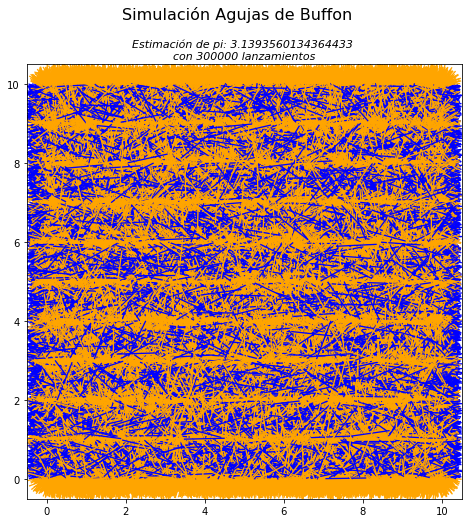

In [10]:
AgujasDeBuffon(300000)

#Referncias:
- [1] S. Hunter, «Buffon». 31 de mayo de 2021. Accedido: 11 de agosto de 2022. [En línea]. Disponible en: https://github.com/samuelyhunter/Buffon/blob/ddc513647864748ae64c3a92538a10d2196388f1/buffon.py


- [2] «Buffon’s Needle, MSTE, University of Illinois». https://mste.illinois.edu/activity/buffon/ (accedido 11 de agosto de 2022).
